# Using the GrainSizeTools script through Jupyter notebook: a step-by-step example

> IMPORTANT NOTE: This Jupyter notebook example only applies to GrainSizeTools v3.0+ Please check your script version before using this notebook. You will be able to reproduce all the results shown in this tutorial using the dataset provided with the script, the ```file data_set.txt```

## Running the script

The first step when working with Jupyter notebooks is to run the script. For this we use the following code snippet:

In [1]:
# Run the script (change the path to GrainSizeTools_script.py!)
%run C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/GrainSizeTools_script.py

module plot imported
module averages imported
module stereology imported
module piezometers imported
module template imported

Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: v3.0beta3 (2020-04-16)
Documentation: https://marcoalopez.github.io/GrainSizeTools/

Type get.functions_list() to get a list of the main methods



Note that for the above code execution to work you must set your own path that indicates where the file ``GrainSizeTools_script.py`` is located in your system. If the script was executed correctly you will see that all GrainSizeTools (GST) modules have been loaded correctly and a welcome message.

## Import the example dataset and create a toy dataset

The second step is to import the file data_set.txt that comes with the GST script and contains a example dataset to interact with the script. You can use your own dataset if you prefer.

In [2]:
# we will use the pandas method read_csv and store the dataset in a variable named df
dataset = pd.read_csv('DATA/data_set.txt', sep='\t')
dataset

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970
...,...,...,...,...,...,...,...,...,...,...,...
2656,2657,452.50,0.789,28.504,1368.0,1565.5,127.875,22.500,1.235,0.810,0.960
2657,2658,1081.25,0.756,47.909,1349.5,1569.5,108.246,31.363,1.446,0.692,0.960
2658,2659,513.50,0.720,32.962,1373.0,1586.0,112.286,20.496,1.493,0.670,0.953
2659,2660,277.75,0.627,29.436,1316.0,1601.5,159.102,17.002,1.727,0.579,0.920


Some important things to note about the code snippet used above are:
- We used the ``read_csv`` method to import the file. By default, this method sets the separator to a comma (note that csv means comma-separated values), in this case the imported file is a text file separated by tabs and then we must set ``'\t'`` as separator.
- We didn't have to define the full path to find the file *data_set.txt*. This is because when we run the script, the reference working directory is the one that contains the script. Since our file *data_set.txt* is within this directory, specifically within the "DATA" folder, it is not necessary to define the complete path but the relative one. You can define the full path if you wish.
- When calling the variable ``dataset`` it returs a visualization of the dataset imported, which is a tabular-like dataset with 2661 entries and 11 columns with different grain properties.

In Python, this type of tabular-like objects are called (Pandas) dataframes and allow a flexible and easy to use data analysis. Just for checking:

In [3]:
type(dataset)  # show the variable type

pandas.core.frame.DataFrame

If you want to view or interact with one of the columns you can do it as follows:

In [4]:
dataset['Area']  # view the column 'Area'

0        157.25
1       2059.75
2       1961.50
3       5428.50
4        374.00
         ...   
2656     452.50
2657    1081.25
2658     513.50
2659     277.75
2660     725.00
Name: Area, Length: 2661, dtype: float64

In [5]:
np.mean(dataset['Area'])  # estimate the arithmetic mean of the column 'Area'

1213.8237504697481

In [6]:
dataset.head()  # show the first rows of the dataset

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970


As you can see above, our dataset does not contain any column with the grain diameters and therefore we have to estimate them. For that we are going estimate the apparent diameters from the section areas using the equivalent circular diameter (ECD) formula which is

$ECD = 2 \cdot \sqrt{areas / \pi}$

In [7]:
# Estimate the ECDs and store them in a column named 'diameters'
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)
dataset.head(10)

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,diameters
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937,14.149803
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972,51.210889
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972,49.974587
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947,83.137121
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970,21.821815
5,6,606.75,0.645,42.521,2293.5,19.5,131.186,20.829,2.021,0.495,0.946,27.794570
6,7,1105.25,0.682,52.787,2247.0,35.5,174.019,29.766,1.741,0.574,0.955,37.513304
7,8,800.75,0.744,42.030,2405.0,57.5,32.367,29.009,1.498,0.667,0.955,31.930339
8,9,1848.25,0.782,60.618,814.5,32.5,118.045,44.729,1.306,0.765,0.972,48.510463
9,10,1916.00,0.744,59.112,2327.0,35.5,125.707,44.136,1.357,0.737,0.932,49.391568


You can see a new column named diameters. In addition, to play with the script we are going to create a synthetic lognormal dataset of size 500 with a scale (geometric mean) equal to 20 and a lognormal shape (MSD) of 1.5.

In [8]:
scale = np.log(20)  # set sample geometric mean to 20
shape = np.log(1.5)  # set the lognormal shape to 1.5

# generate a random lognormal population of size 500
np.random.seed(seed=1)  # this is to generate always the same population
toy_dataset = np.random.lognormal(mean=scale, sigma=shape, size=500)

## Getting a description of the grain size population

Now we want to describe the properties of the grain size population. First, we are going to visualize the list of main functions.

In [9]:
get.functions_list()


List of main functions
summarize              -> get the properties of the data population
conf_interval          -> estimate a robust confidence interval using the t-distribution
calc_diffstress        -> estimate diff. stress from grain size using piezometers

plot.distribution      -> visualize the distribution of grain sizes and locate the averages
plot.qq_plot           -> test the lognormality of the dataset (q-q plot + Shapiro-Wilk test)
plot.area_weighted     -> visualize the area-weighed distribution of grain sizes
plot.normalized        -> visualize a normalized distribution of grain sizes

stereology.Saltykov    -> approximate the actual grain size distribution via the Saltykov method
stereology.calc_shape  -> approximate the lognormal shape of the actual distribution

You can get more information about the methods using the following ways:
    (1) Typing help plus the name of the function e.g. help(summarize)
    (2) In the Spyder IDE by writing the name of the function an

So, the method to use for getting the properties of the data population is named ``summarize``. For this we call the function ```summarize()``` and pass the dataset. Let's do it with the synthetic data first:

In [10]:
summarize(toy_dataset)

 
CENTRAL TENDENCY ESTIMATORS
Arithmetic mean = 22.13 microns
Confidence intervals at 95.0 %
mCox method: 21.35 - 22.98 (-3.5%, +3.8%), length = 1.623
Geometric mean = 20.44 microns
Confidence interval at 95.0 %
CLT method: 19.73 - 21.17 (-3.5%, +3.6%), length = 1.441
Median = 20.32 microns
Confidence interval at 95.0 %
robust method: 19.33 - 21.42 (-4.9%, +5.4%), length = 2.096
Mode (KDE-based) = 17.66 microns
Maximum precision set to 0.1
KDE bandwidth = 2.78 (silverman rule)
 
DISTRIBUTION FEATURES
Sample size (n) = 500
Standard deviation = 9.07 (1-sigma)
Interquartile range (IQR) = 11.44
Lognormal shape (Multiplicative Standard Deviation) = 1.49
Shapiro-Wilk test warnings:
Data is not normally distributed!
Normality test: 0.88, 0.00 (test statistic, p-value)


The ``summarize`` method returns different central tendency estimators (averages), the confidence intervals, and several distribution features such as dispersion and shape. Also a Shapiro-Wilk warning telling as that our distribution is not normally distributed, which is to be expected since we know that this is a lognormal distribution. Note that the geometric mean and the lognormal shape are very close to the values used to generate the syntethic dataset, 20 and 1.5 respectively. Let's do the same using the dataset that comes from a real rock, for this we have to pass the column with the diameters:

In [11]:
summarize(dataset['diameters'])

 
CENTRAL TENDENCY ESTIMATORS
Arithmetic mean = 34.79 microns
Confidence intervals at 95.0 %
CLT (ASTM) method: 34.09 - 35.48, (±2.0%), length = 1.393
Geometric mean = 30.10 microns
Confidence interval at 95.0 %
CLT method: 29.47 - 30.75 (-2.1%, +2.2%), length = 1.283
Median = 31.53 microns
Confidence interval at 95.0 %
robust method: 30.84 - 32.81 (-2.2%, +4.1%), length = 1.970
Mode (KDE-based) = 24.31 microns
Maximum precision set to 0.1
KDE bandwidth = 4.01 (silverman rule)
 
DISTRIBUTION FEATURES
Sample size (n) = 2661
Standard deviation = 18.32 (1-sigma)
Interquartile range (IQR) = 23.98
Lognormal shape (Multiplicative Standard Deviation) = 1.75
Shapiro-Wilk test warnings:
Data is not normally distributed!
Normality test: 0.94, 0.00 (test statistic, p-value)
Data is not lognormally distributed!
Lognormality test: 0.99, 0.03 (test statistic, p-value)


TODO
We will also visualize the grain size population using the ``plot.distribution()`` function of the plot module:

Number of classes =  45
binsize =  3.41
KDE bandwidth =  4.01


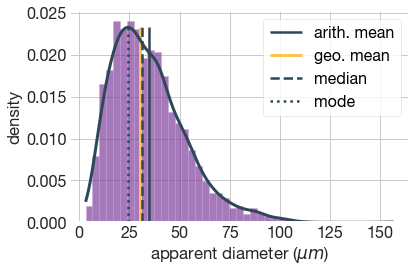

In [12]:
fig, ax = plot.distribution(dataset['diameters'])  # this is just to show the plot in the notebook

> 👉 Note that when calling ``plot.distribution()`` we save two variables ``fig`` and ``ax``. The variable ``fig`` stems for figure and ``ax`` for the axe to the current figure*. This is not compulsory. Indeed, you can directly write ``plot.distribution(dataset['diameters'])`` to get the inline plot. However, if you want to save or tweak the plot you will need the ``fig`` and ``ax`` variables (or any name you prefer). The variable ``fig`` allows you to save the plot (see an example below) among other things. On the other hand, the ``ax`` allows you to tweak the axe of the plot, some examples would be:
>
> ``ax.set_xlabel('diameter ($\mu m$)', color='red')  # set a different label for x``
> ``ax.set_ylabel('density', fontsize=18)  # increase the label font size for y``
> ``ax.legend(loc='lower right', fontsize=18) # change the position of the legend``
> ...
>
> *If you can't tell the difference between a figure and an axe check the elements of a figure here: https://matplotlib.org/3.2.1/gallery/showcase/anatomy.html

In [13]:
# If you want to save the plot in your hard disk
fig.savefig("test_distribution.png", dpi=300)

Now, let's plot the area weighted distribution

DESCRIPTIVE STATISTICS
Area-weighted mean grain size = 53.88 microns
HISTOGRAM FEATURES
The modal interval is 40.85 - 44.26 microns
The number of classes are 46
The bin size is 3.40 according to the auto rule


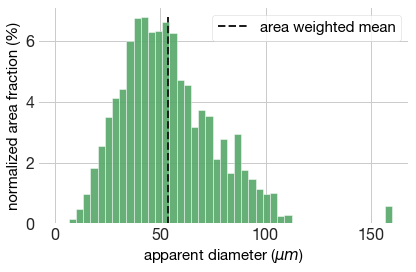

In [14]:
fig2, ax = plot.area_weighted(dataset['diameters'], dataset['Area'])

Normalized SD = 0.165
KDE bandwidth =  0.04


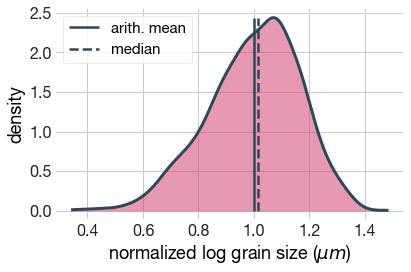

In [15]:
fig3, ax = plot.normalized(dataset['diameters'])

## Piezometric analysis

In [16]:
piezometers.quartz()

Available piezometers:
'Cross'
'Cross_hr'
'Holyoke'
'Holyoke_BLG'
'Shimizu'
'Stipp_Tullis'
'Stipp_Tullis_BLG'
'Twiss'


In [17]:
calc_diffstress(12, phase='quartz', piezometer='Twiss')

differential stress = 83.65 MPa

INFO:
Ensure that you entered the apparent grain size as the arithmeic mean grain size
ECD was converted to linear intercepts using de Hoff and Rhines (1968) correction


In [18]:
# you can correct the differential stress estimate for plane strain using
# the correction proposed by Paterson and Olgaard (2000)
calc_diffstress(12, phase='quartz', piezometer='Twiss', correction=True)

differential stress = 96.59 MPa

INFO:
Ensure that you entered the apparent grain size as the arithmeic mean grain size
ECD was converted to linear intercepts using de Hoff and Rhines (1968) correction


In [19]:
# you can use (numpy) arrays as the input instead of scalar values
ameans = np.array([12.23, 13.71, 12.76, 11.73, 12.69, 10.67])
estimates = calc_diffstress(ameans, phase='olivine', piezometer='VanderWal_wet')
estimates

INFO:
Ensure that you entered the apparent grain size as the arithmetic mean in linear scale
ECD was converted to linear intercepts using de Hoff and Rhines (1968) correction
Differential stresses in MPa


array([167.41, 153.66, 162.16, 172.73, 162.83, 185.45])

and then estimate the arithmetic mean and the confidence interval of all estimates as follows:

In [20]:
conf_interval(estimates)

 
Mean = 167.37 ± 11.41
Confidence set at 95.0 %
Max / min = 178.79 / 155.96
Coefficient of variation = 6.8 %


(167.37333333333333, 11.412701448126, (155.96063188520733, 178.78603478145934))

In [21]:
piezometers.olivine('VanderWal_wet')

(1355.4,
 0.75,
 'Ensure that you entered the apparent grain size as the arithmetic mean in linear scale',
 True,
 1.5)

## Stereology module

TODO

volume fraction (up to 50 microns) = 41.65 %
bin size = 14.24


(<Figure size 936x360 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1af455d9f48>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1af455fd948>))

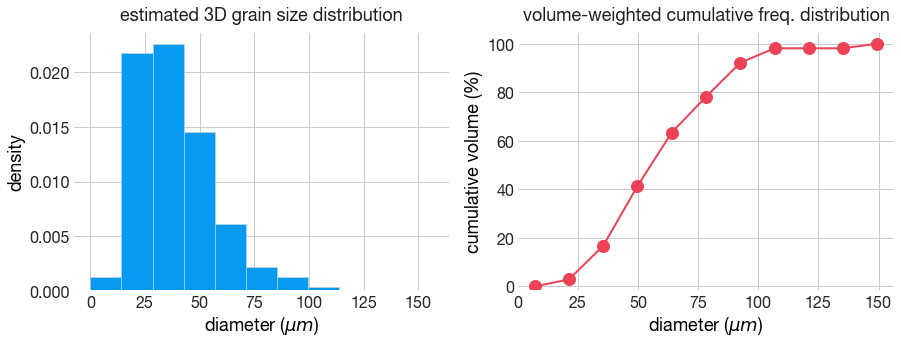

In [22]:
stereology.Saltykov(dataset['diameters'], numbins=11, calc_vol=50)

OPTIMAL VALUES
Number of classes: 11
MSD (lognormal shape) = 1.63 ± 0.06
Geometric mean (scale) = 36.05 ± 1.27


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1af457e9508>)

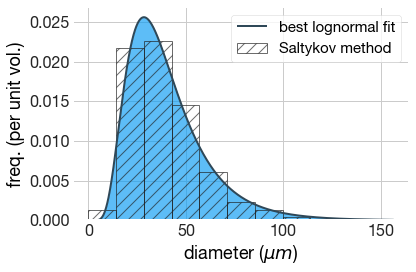

In [23]:
stereology.calc_shape(dataset['diameters'])